In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, random, shutil, time
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sys

#mac
#util_path = "/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/util"

#constance
#'''
args = sys.argv[0:]
py_file = args[0]
py_file_wo_path = os.path.basename(py_file)

code_location = os.path.dirname(os.path.abspath(py_file))
index_of_latest = code_location.index('latest')
util_path = os.path.join(code_location[:index_of_latest], "latest", "util")
print ("util_path:"+ str(util_path))
#'''

sys.path.insert(0, util_path)

In [2]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd/2_bmd_cal_itself/latest/phase_I_II/LPR/240_timepoints/all_conc


In [3]:
# mac       - phase I && II - LPR - after_merging - 240 timepoints
# (made on 4/28/2021 in constance)
#complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/wide/04_28_2021/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_full_240_timepoints_wide_full.csv'
# 196 unique chemicals

# constance
complete_file_path = '/people/kimd999/tox/phase_I_II/LPR/input/wide/2021_04_28/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_full_240_timepoints_wide_t0_t239_full.csv'


df_lpr = pd.read_csv(complete_file_path, header = 0)
display(df_lpr.head())

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,1030.0,9414.0,A01,1030_9414.0_A01,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1030.0,9414.0,A02,1030_9414.0_A02,35.6,0.0,1.2,0.0,0.0,0.0,...,0.0,0.0,3.1,12.7,16.3,11.7,13.9,16.0,20.0,18.6
2,1030.0,9414.0,A03,1030_9414.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.6,6.4,7.1,7.6,12.2,13.7,5.5,0.0
3,1030.0,9414.0,A04,1030_9414.0_A04,5.0,0.0,1.7,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1030.0,9414.0,A05,1030_9414.0_A05,1.0,3.0,0.0,0.0,0.0,0.0,...,1.8,14.4,24.2,29.3,16.7,30.8,2.3,0.0,6.4,8.7


In [4]:
display(len(np.unique(df_lpr['chemical.id'])))
display(np.unique(df_lpr['chemical.id']))

df_lpr = df_lpr[df_lpr['chemical.id'].notna()]

display(len(np.unique(df_lpr['chemical.id'])))
display(np.unique(df_lpr['chemical.id']))

1348

array([53., 54., 56., ..., nan, nan, nan])

196

array([  53.,   54.,   56.,   57.,   58.,   60.,   61.,   62.,   63.,
         64.,   65.,   66.,   67.,   69.,   70.,  129.,  155.,  220.,
        227.,  246.,  247.,  248.,  250.,  251.,  252.,  281.,  283.,
        285.,  286.,  295.,  296.,  297.,  360.,  365.,  381.,  384.,
        392.,  404.,  406.,  409.,  412.,  414.,  415.,  416.,  417.,
        418.,  419.,  420.,  441.,  447.,  448.,  500.,  501.,  502.,
        503.,  504.,  511.,  512.,  513.,  514.,  515.,  517.,  596.,
        597.,  601.,  602.,  609.,  618.,  628.,  629.,  667.,  674.,
        689.,  691.,  694.,  696.,  697.,  721.,  722.,  741.,  746.,
        747.,  768.,  769.,  770.,  771.,  774.,  775.,  776.,  777.,
        778.,  946.,  947.,  948.,  949.,  952.,  961.,  965.,  966.,
        998., 1030., 1031., 1105., 1114., 1161., 1163., 1166., 1171.,
       1172., 1174., 1175., 1176., 1177., 1178., 1179., 1180., 1182.,
       1211., 1221., 1307., 1316., 1354., 1370., 1371., 1449., 1595.,
       1603., 1610.,

In [5]:
# preprocess chemical ids
df_lpr['chemical.id'] = (df_lpr['chemical.id'].values).astype(int)
df_lpr['chemical.id'] = (df_lpr['chemical.id'].values).astype(str)

display(len(np.unique(df_lpr['chemical.id'])))
#display(np.unique(df_lpr['chemical.id']))
display(df_lpr.head())

#df_per_chemical = df_lpr.loc[df_lpr['chemical.id'] == "-9223372036854775808"]
#display(df_per_chemical.head())

196

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,1030,9414.0,A01,1030_9414.0_A01,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1030,9414.0,A02,1030_9414.0_A02,35.6,0.0,1.2,0.0,0.0,0.0,...,0.0,0.0,3.1,12.7,16.3,11.7,13.9,16.0,20.0,18.6
2,1030,9414.0,A03,1030_9414.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.6,6.4,7.1,7.6,12.2,13.7,5.5,0.0
3,1030,9414.0,A04,1030_9414.0_A04,5.0,0.0,1.7,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1030,9414.0,A05,1030_9414.0_A05,1.0,3.0,0.0,0.0,0.0,0.0,...,1.8,14.4,24.2,29.3,16.7,30.8,2.3,0.0,6.4,8.7


In [6]:
# preprocess plate ids
df_lpr['plate.id'] = (df_lpr['plate.id'].values).astype(int)
df_lpr['plate.id'] = (df_lpr['plate.id'].values).astype(str)

display(len(np.unique(df_lpr['plate.id'])))
#display(np.unique(df_lpr['plate.id']))
display(df_lpr.head())

470

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,1030,9414,A01,1030_9414.0_A01,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1030,9414,A02,1030_9414.0_A02,35.6,0.0,1.2,0.0,0.0,0.0,...,0.0,0.0,3.1,12.7,16.3,11.7,13.9,16.0,20.0,18.6
2,1030,9414,A03,1030_9414.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.6,6.4,7.1,7.6,12.2,13.7,5.5,0.0
3,1030,9414,A04,1030_9414.0_A04,5.0,0.0,1.7,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1030,9414,A05,1030_9414.0_A05,1.0,3.0,0.0,0.0,0.0,0.0,...,1.8,14.4,24.2,29.3,16.7,30.8,2.3,0.0,6.4,8.7


## Load morphological data for filtering wells that have dead fish

In [7]:
#mac       - phase I && II - morpho - full
#morph_data_file_complete_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/morpho/wide/2_after_fixing_MO24/zf_morphology_data_335_chemicals_2020DEC16_fixed_wide_DNC_0_full.csv'

#constance - phase I && II - morpho - full
morph_data_file_complete_path = '/people/kimd999/tox/phase_I_II/morpho/input/wide/2_after_fixing_MO24/zf_morphology_data_335_chemicals_2020DEC16_fixed_wide_DNC_0_full.csv'

df_morph = pd.read_csv(morph_data_file_complete_path, header = 0)
display(df_morph.head())
display(len(df_morph))

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRAI,CFIN,CIRC,DNC_,...,PE__,PFIN,PIG_,SM24,SNOU,SOMI,SWIM,TRUN,TR__,YSE_
0,53,9289,A01,53_9289_A01,50.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,53,9289,A02,53_9289_A02,35.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53,9289,A03,53_9289_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,9289,A04,53_9289_A04,5.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,53,9289,A05,53_9289_A05,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


69395

In [8]:
# Goal of this box 
# -> (in df_lpr) leave only rows with non 1 and NA MORT

# Running time
# 13 seconds took for all 196 chemicals

# 1. Append additional identifier column (Plate_Well value) to lpr and morphology data
# 2. Find rows in morphology data for which MORT end-point is not 1 or NA
# 3. Using Plate_Well values, find corresponding rows in lpr data to filter the data

# (ref)
# '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/tall/bifurcated/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_merged_full_240_timepoints_cpw_added.csv'
# cpw added here already to save 23 minutes

start_time = time.time()

df_lpr['Chemical_Plate_WELL'] = df_lpr[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
# used to take few minutes, but in 5/9/2021, it takes 23 minutes

display(df_lpr.head())
print("\ndf_lpr.shape:" + str(df_lpr.shape)) #(11,184,240, 7)


df_morph['Chemical_Plate_WELL'] = df_morph[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
#display(df_morph.head())
#print("df_morph.shape:" + str(df_morph.shape)) # (69395, 29)

df_morpho_nonna_plate_well = df_morph.Chemical_Plate_WELL[~((df_morph.MORT == 1) | (df_morph.MORT.isnull()))]
#display(df_morpho_nonna_plate_well.head())
#print("df_morpho_nonna_plate_well.shape:" + str(df_morpho_nonna_plate_well.shape)) # (57558,)

df_lpr_filtered = df_lpr.loc[df_lpr['Chemical_Plate_WELL'].isin(list(df_morpho_nonna_plate_well.values))]
#display('df_lpr_filtered.head()',df_lpr_filtered.head())
print("df_lpr_filtered.shape:"+str(df_lpr_filtered.shape) + "\n") #(8,309,280, 7)

#display(df_morpho_nonna_plate_well[0:5])
print ("\n")
#display(df_lpr.Chemical_Plate_WELL[0:5])

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took)) # 13 seconds took for all 196 chemicals

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
0,1030,9414,A01,1030_9414.0_A01,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1030_9414_A01
1,1030,9414,A02,1030_9414.0_A02,35.6,0.0,1.2,0.0,0.0,0.0,...,0.0,3.1,12.7,16.3,11.7,13.9,16.0,20.0,18.6,1030_9414_A02
2,1030,9414,A03,1030_9414.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,1.6,6.4,7.1,7.6,12.2,13.7,5.5,0.0,1030_9414_A03
3,1030,9414,A04,1030_9414.0_A04,5.0,0.0,1.7,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1030_9414_A04
4,1030,9414,A05,1030_9414.0_A05,1.0,3.0,0.0,0.0,0.0,0.0,...,14.4,24.2,29.3,16.7,30.8,2.3,0.0,6.4,8.7,1030_9414_A05



df_lpr.shape:(45297, 246)
df_lpr_filtered.shape:(33570, 246)



Done, it took:18.8 seconds


In [9]:
# Goal of this box -> 
# Convert time resolution to minutes (if applicable)
# For LPR, 240 timepoints -> 24 timepoints
# Create a new dataframe for storing lpr data in the new time-scale (minutes)
# The new dataframe contains the same basic row identifier fields

# Running time
# -> 0.5 seconds for 1 chemical

start_time = time.time()

df_lpr_min = df_lpr_filtered[['chemical.id', 'conc', 'plate.id', 'well']]

time_index_sec_start = 5
max_time_index_sec   = 240 # from t0 to t239

#report = True
report = False

interval = "1 min"
#interval = "30 sec"
#interval = "12 sec"
print ("interval:" + str(interval))

print ("(before transforming for " + str(interval) + "), df_lpr_min.shape:" + str(df_lpr_min.shape))

if (interval == "1 min"):
    group_size = 10 # (10 X 6 sec/sample = 1 min/sample)
elif (interval == "30 sec"):
    group_size = 5 # (5 X 6 sec/sample = 1 min/sample)
else: # interval = "12 sec"
    group_size = 2 # (2 X 6 sec/sample = 1 min/sample)
    
for time_index in range(int(max_time_index_sec / group_size)):
    start_index = time_index_sec_start + group_size * time_index
    end_index = start_index + group_size
    if (report):
        print ("\ntime_index:" + str(time_index))
        print ("start_index:"  + str(start_index))
        print ("end_index:"    + str(end_index))
        
    df_lpr_min_in_this_time_index = pd.DataFrame(np.sum(df_lpr_filtered.iloc[:,start_index:end_index], axis = 1))
    #if (report):
        # print ("df_lpr_min_in_this_time_index.shape:\n" + str(df_lpr_min_in_this_time_index.shape))
        # display(df_lpr_min_in_this_time_index.head())
        # display(df_lpr_min_in_this_time_index.tail())
        # display(df_lpr_min_in_this_time_index)
    
    df_lpr_min_in_this_time_index.columns = ['t' + str(time_index)]
    #lpr_filtered_data_in_minutes_in_this_time_index.columns = np.transpose(['t' + str(i) for i in range(int(max_time_index_sec / group_size))])
    df_lpr_min = pd.concat([df_lpr_min, df_lpr_min_in_this_time_index], axis = 1)
    
    #display(df_lpr_min.head())
    #display(df_lpr_min.tail())
    
pd.set_option('display.max_columns', None)

print ("(after  transforming for " + str(interval) + "), df_lpr_min.shape:" + str(df_lpr_min.shape))
# for chemical.id = 53 -> (184, 28)
#display(df_lpr_min.head())

#lpr_filtered_data_in_minute.head(100) # this should have only 0~23 Tns

df_lpr_min['chemical_conc'] = df_lpr_min[['chemical.id','conc']].apply(lambda x: '_'.join(x.map(str)), axis = 1)

#cwd = os.getcwd()
#print (cwd)
#df_lpr_min.to_csv("df_lpr_min.csv",index=False)

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Conversion of time interval is done. It took "+str(time_took))
# -> 0.5 seconds for 1 chemical

interval:1 min
(before transforming for 1 min), df_lpr_min.shape:(33570, 4)
(after  transforming for 1 min), df_lpr_min.shape:(33570, 28)
/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd/2_bmd_cal_itself/latest/phase_I_II/LPR/240_timepoints/all_conc
Conversion of time interval is done. It took 6.8 seconds


df_lpr_min.shape:(33570, 29)


33570

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
0,1030,50.0,9414,A01,0.0,0.0,0.0,84.5,121.3,119.1,0.0,0.0,1.4,103.2,96.9,82.9,28.4,0.0,0.0,17.3,26.1,53.8,50.4,8.6,0.0,1.8,37.1,0.0,1030_50.0
1,1030,35.6,9414,A02,1.2,3.0,0.0,162.1,158.4,181.6,46.2,0.0,0.0,42.4,122.9,145.8,94.5,0.0,5.3,37.1,121.3,153.6,203.2,24.1,2.1,0.0,38.5,112.3,1030_35.6
2,1030,11.2,9414,A03,0.0,0.0,0.0,42.8,82.6,63.8,7.5,0.0,40.6,20.3,45.0,58.3,28.2,0.0,43.9,0.0,12.3,67.7,84.2,22.2,0.0,15.2,60.4,54.1,1030_11.2
3,1030,5.0,9414,A04,2.7,1.8,6.3,17.4,41.7,9.4,1.7,0.0,2.2,16.3,0.9,20.5,8.8,0.0,0.0,22.2,11.7,43.3,153.7,16.6,0.0,0.0,21.8,0.0,1030_5.0
4,1030,1.0,9414,A05,3.0,1.3,4.5,168.8,214.3,154.0,10.4,2.9,6.5,128.0,173.5,178.3,90.8,0.0,10.3,40.0,26.9,153.1,112.4,38.9,1.0,4.7,67.4,134.6,1030_1.0


'\n# save image file\ncomplete_file_path_basename = os.path.basename(complete_file_path)\noutput_filename_wo_ext = os.path.splitext(complete_file_path_basename)[0]\noutput_filename = output_filename_wo_ext + "_all_conc.png"\ncwd = os.getcwd()\nprint (cwd)\nprint (output_filename)\nplt.savefig(output_filename, bbox_inches="tight")\nprint ("image file is saved")'

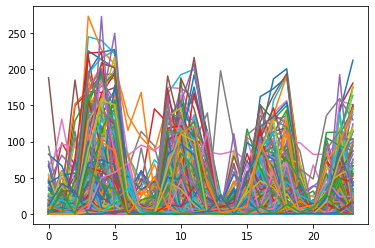

In [10]:
# Plot few lpr curves to check transition points
# all concentrations
time_index_start = 4 # because 0-3th columns show irrelevant values (e.g. chemical.id, conc, plate.id, well)
num_time_points = 24 # >= 25 will not make any difference

print ("df_lpr_min.shape:" + str(df_lpr_min.shape))
# chemical.id 414 -> (181, 29)
# all 197 chemicals that have 240 variables -> (15718, 29)

#print (df_lpr_min.iloc[:1, time_index_start:time_index_start + num_time_points]) 
# first ':' shows rows, second ':' shows columns

fig, ax = plt.subplots()

ax.plot(np.transpose(df_lpr_min.iloc[10:223,time_index_start:time_index_start + num_time_points].values));
#ax.plot(np.transpose(df_lpr_min.iloc[:,time_index_start:time_index_start + num_time_points].values));
#ax.plot(np.transpose(df_lpr_min.iloc[:,time_index_start:time_index_start+5].values));
display(len(df_lpr_min))
display(df_lpr_min.head())

'''
# save image file
complete_file_path_basename = os.path.basename(complete_file_path)
output_filename_wo_ext = os.path.splitext(complete_file_path_basename)[0]
output_filename = output_filename_wo_ext + "_all_conc.png"
cwd = os.getcwd()
print (cwd)
print (output_filename)
plt.savefig(output_filename, bbox_inches="tight")
print ("image file is saved")'''

In [11]:
## Calculate MOV, AUC for all chemical concentrations

delta_mov_auc = df_lpr_min[['chemical.id', 'conc', 'plate.id', 'well']].copy()

trans_points = [2,8,14,20] # "official"

end_points = ['MOV', 'AUC']

num_light = 3 # seems reasonable since interval between middle points of each peak ~= 6
num_dark  = 3

for trans_index, trans_point in enumerate(trans_points):
#    print ("\ntrans_index:" + str(trans_index))
    print ("trans_point:" + str(trans_point))
    
    for just_index, end_point in enumerate(end_points):
        if (end_point == 'MOV'):
            delta_mov_auc['MOV' + str(trans_index + 1)] = df_lpr_min['t' + str(trans_point + 1)] - df_lpr_min['t' + str(trans_point)]
        else:
            delta_mov_auc['AUC' + str(trans_index + 1)] \
            = sum(df_lpr_min['t' + str(trans_point + 1 + index_count)] \
                  for index_count in range(num_dark)) \
            - sum(df_lpr_min['t' + str(trans_point - index_count)] \
                  for index_count in range(num_light))

display(delta_mov_auc.head())
display(delta_mov_auc.shape)
#cwd = os.getcwd()
#print (cwd)
#delta_mov_auc.to_csv("delta_mov_auc.csv", index=False)

trans_point:2
trans_point:8
trans_point:14
trans_point:20


,chemical.id,conc,plate.id,well,MOV1,AUC1,MOV2,AUC2,MOV3,AUC3,MOV4,AUC4
0,1030,50.0,9414,A01,84.5,324.9,101.8,281.6,17.3,68.8,1.8,-20.1
1,1030,35.6,9414,A02,162.1,497.9,42.4,264.9,31.8,212.2,-2.1,-78.6
2,1030,11.2,9414,A03,42.8,189.2,-20.3,75.5,-43.9,7.9,15.2,23.3
3,1030,5.0,9414,A04,11.1,57.7,14.1,33.8,22.2,68.4,0.0,-148.5
4,1030,1.0,9414,A05,164.3,528.3,121.5,460.0,29.7,118.9,3.7,54.4


(33570, 12)

In [12]:
import generate_dose_response as gdr
import BMD_BMDL_estimation as bmdest
import Plot_Save as ps

In [13]:
# This box is essential for BMD calculation
# Rename column headers to make it compatible with earlier data received from Lisa
delta_mov_auc.rename(columns={"chemical.id": "Chemical.ID", "conc": "CONC", "plate.id": "Plate", "well": "WELL"}, inplace = True)
display(delta_mov_auc.head())
#display(delta_mov_auc.tail())

,Chemical.ID,CONC,Plate,WELL,MOV1,AUC1,MOV2,AUC2,MOV3,AUC3,MOV4,AUC4
0,1030,50.0,9414,A01,84.5,324.9,101.8,281.6,17.3,68.8,1.8,-20.1
1,1030,35.6,9414,A02,162.1,497.9,42.4,264.9,31.8,212.2,-2.1,-78.6
2,1030,11.2,9414,A03,42.8,189.2,-20.3,75.5,-43.9,7.9,15.2,23.3
3,1030,5.0,9414,A04,11.1,57.7,14.1,33.8,22.2,68.4,0.0,-148.5
4,1030,1.0,9414,A05,164.3,528.3,121.5,460.0,29.7,118.9,3.7,54.4


In [ ]:
# Calculate BMD finally
start_time = time.time()
os.chdir(starting_dir)

if (os.path.isdir("output") == True):
    shutil.rmtree("output")
os.mkdir("output")

output_folder = os.path.join(starting_dir, "output")
os.chdir(output_folder)

full_devel = "full"
#full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(delta_mov_auc['Chemical.ID'])
    end_points_from_here = ['MOV1','AUC1']
else:
    chemical_id_from_here = [53]
    end_points_from_here = ['MOV1']

#report = True
report = False

total_number_of_chemicals_to_processed = len(chemical_id_from_here)
number_of_chemicals_processed = 0

for chemical_id in chemical_id_from_here:
    print("\nchemical_id:" + str(chemical_id))
    for end_point in end_points_from_here:
        if (report): print("end_point:" + str(end_point))
        # subset original dataframe for a user-specified chemical and end_point pair
        delta_mov_auc_end_point_chemical_id = delta_mov_auc.loc[delta_mov_auc['Chemical.ID'] == chemical_id,['Chemical.ID', 'CONC', 'Plate', 'WELL', end_point]]
        #print("delta_mov_auc_end_point_chemical_id:\n"+str(delta_mov_auc_end_point_chemical_id))
        #print("type(delta_mov_auc_end_point_chemical_id):\n"+str(type(delta_mov_auc_end_point_chemical_id)))
        #print("type(end_point):\n"+str(type(end_point)))

        dose_response = gdr.gen_dose_response_behavior(delta_mov_auc_end_point_chemical_id, end_point)
        if (report): print("dose_response:\n"+str(dose_response))
        qc_flag = gdr.BMD_feasibility_analysis(dose_response)
        print ("qc_flag:"+str(qc_flag))
        test_dose_response = gdr.reformat_dose_response(dose_response)
        #test_dose_response = dose_response
        if(qc_flag in [0, 1]):
            # No BMD analysis required. Generate report and exit
            ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, None)
        else:
            # Fit dose response models
            model_predictions = bmdest.analyze_dose_response_data(test_dose_response)
            # Select best model
            selected_model_params = bmdest.select_model(model_predictions)
            # Check if unique model is found
            unique_model_flag = selected_model_params['no_unique_model_found_flag']
            if(unique_model_flag == 0):
                # Generate report
                ps.save_results_good_data_unique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
            else:
                bmd_analysis_flag = selected_model_params['model_select_flag']
                if(bmd_analysis_flag == 1):
                    ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, selected_model_params)
                else:
                    ps.save_results_good_data_nounique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
                    
    number_of_chemicals_processed += 1
    print_this = str(number_of_chemicals_processed) + " chemicals processed out of " + str(total_number_of_chemicals_to_processed)
    print(print_this)
    
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took))
# 1 chemical (3756) and 2 endpoints (['MOV1','AUC1']), 140 seconds took
# 7 chemicals and 2 endpoints (['MOV1','AUC1']), 6 minutes took
# [mac] 186 chemicals and 2 endpoints (['MOV1','AUC1']), 6 hrs took
# [constance] 186 chemicals and 2 endpoints (['MOV1','AUC1']), 4.5 hrs took

time_filename = 'running_time.txt'
f_time = open(time_filename, 'w')
f_time.write(str(time_took))
f_time.close()

In [ ]:
####### stop here
a=b

In [ ]:
display("before dropna, len(df_lpr_filtered):"+str(len(df_lpr_filtered)))
df_lpr_filtered_no_na = df_lpr_filtered.dropna(how='any')
display("after dropna,  len(df_lpr_filtered_no_na):"+str(len(df_lpr_filtered_no_na)))

is_NaN = df_lpr_filtered.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_lpr_filtered[row_has_NaN]

display(rows_with_NaN.head())
display(len(rows_with_NaN))

In [ ]:
#df_lpr.to_csv("df_lpr_cpw_added.csv",index=False)
df_lpr_filtered.to_csv("df_lpr_filtered_cpw_added.csv",index=False)

In [ ]:
# skip this
"(Lisa) LPR (5d): L1: T61-89; D1: T90-119; L2: T120-149; D2: T150-179; L3: T180-209; D3: T210-239"

# (L0,D0) 
# T1 - T60 --> 360 seconds -> 6 minutes

# (L1,D1) 
# T61 - T120 --> 360 seconds -> 6 minutes

# (L2,D2) 
# T121 - T180 --> 360 seconds -> 6 minutes

# (L3,D3) 
# T181 - T240 --> 360 seconds -> 6 minutes

In [ ]:
# calculate new decreasing endpoints
delta_mov_auc_w_decreasing = delta_mov_auc.copy()
for transition_index, transition_point in enumerate(transition_points):
    print ("\ntransition_index:" + str(transition_index))
    print ("transition_point:" + str(transition_point))
    
    for just_index, end_point in enumerate(end_points):
        ori = str(end_point) + str(transition_index + 1)
        #print ("\nori:" + str(ori))
        #print ("delta_mov_auc_w_decreasing[ori]:\n" + str(delta_mov_auc_w_decreasing[ori]))
        
        for new_index in range(len(transition_points)-1):
            final_index = transition_index + new_index
            new = str(end_point) + str(final_index+2)
            #print ("new:" + str(new))
            check_whether_new_exists = new in delta_mov_auc_w_decreasing.columns
            #print ("check_whether_new_exists:"+str(check_whether_new_exists))
            if (check_whether_new_exists == False):
                continue
            name = str(end_point) + str(transition_index + 1) + "_" + str(new)
            print ("name:" + str(name))
            delta_mov_auc_w_decreasing[name] \
                = delta_mov_auc_w_decreasing[ori] - delta_mov_auc_w_decreasing[new]
display (delta_mov_auc_w_decreasing.head(1))

In [ ]:
# calculate final decreasing endpoints
delta_mov_auc_w_decreasing_copied = delta_mov_auc_w_decreasing.copy()
delta_mov_auc_final = delta_mov_auc_w_decreasing.copy()
columns_to_keep = []
for just_index, end_point in enumerate(end_points):
    for (columnName, columnData) in delta_mov_auc_w_decreasing_copied.iteritems():
        if "_" not in columnName:
            continue
        if str(end_point) not in columnName:
            continue
#        print('Colunm Name : ', columnName)
        columns_to_keep.append(columnName)

    delta_mov_auc_w_decreasing_copied_select = delta_mov_auc_w_decreasing_copied.loc[:,columns_to_keep]
    
    # "axis 0” represents rows
    # "axis 1” represents columns

    all_ = delta_mov_auc_w_decreasing_copied_select.sum(axis=1)
   # print ("all_:\n" + str(all_))
    
    final_endpoint_name = str(end_point) + "_all_" 
    delta_mov_auc_final.insert(0, final_endpoint_name, all_)
    

display("delta_mov_auc_final.head():", delta_mov_auc_final.head())
    
delta_mov_auc_final.to_csv("delta_mov_auc_final.csv",index=False)
    